<a href="https://colab.research.google.com/github/SaidFlores22/Regresion-Lineal/blob/main/Actividad_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6.1 (Regresión Lineal Simple)**
## Said Arturo Flores Nieto
## A01703477

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

{}

In [217]:
mexico = pd.read_csv('DF_Mexico.csv', encoding = "unicode_escape", engine = 'python')
eua = pd.read_csv('California_EUA.csv', encoding = "unicode_escape")

## **México DF**

### **Preprocesamiento**

#### ***Valores nulos***

Cantidad total de valores nulos

In [218]:
valores_nulos = mexico.isnull().sum().sum()
valores_nulos

189609

Separamos por tipo de dato

In [219]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [220]:
mexico_o = mexico.select_dtypes(include=['object'])
mexico_i = mexico.select_dtypes(include=['int64'])
mexico_f = mexico.select_dtypes(include=['float'])

mexico_n = pd.concat([mexico_i, mexico_f],axis=1)

Datos numéricos

In [221]:
mexico_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3,7,3,1,1125,0,19,49,324,...,NaN,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,0.19
1,16840050,3,3,2,3,1125,11,41,71,346,...,NaN,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,0.54
2,3531879,4,4,6,24,1125,0,0,0,87,...,NaN,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,0.31
3,153786,1,1,2,1,7,28,58,88,363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196253,16,16,14,1,365,30,59,89,357,...,NaN,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3,4,2,3,365,17,47,77,352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,506816029,1,1,7,1,365,30,60,90,365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,154670560,1,6,2,5,365,29,32,32,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,7799414,13,13,2,1,365,9,39,69,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
valores_nulos = mexico_n.isnull().sum()
valores_nulos

host_id                                             0
host_listings_count                                 0
host_total_listings_count                           0
accommodates                                        0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
id                                                  0
scrape_id                   

*En el caso de todas las columnas de reseñas y calificaciones, con el fin de no afectar estas puntuaciones otorgando valores de 0, se pondra la mediana con el fin de que tampoco se afecte el análisis por valores atipicos. En los otros caso se sustituíran los valores nulos por 0*

In [223]:
mexico_n["review_scores_rating"] = mexico_n["review_scores_rating"].fillna(round(mexico_n["review_scores_rating"].median(),1))
mexico_n["review_scores_accuracy"] = mexico_n["review_scores_accuracy"].fillna(round(mexico_n["review_scores_accuracy"].median(),1))
mexico_n["review_scores_cleanliness"] = mexico_n["review_scores_cleanliness"].fillna(round(mexico_n["review_scores_cleanliness"].median(),1))
mexico_n["review_scores_checkin"] = mexico_n["review_scores_checkin"].fillna(round(mexico_n["review_scores_checkin"].median(),1))
mexico_n["review_scores_communication"] = mexico_n["review_scores_communication"].fillna(round(mexico_n["review_scores_communication"].median(),1))
mexico_n["review_scores_location"] = mexico_n["review_scores_location"].fillna(round(mexico_n["review_scores_location"].median(),1))
mexico_n["review_scores_value"] = mexico_n["review_scores_value"].fillna(round(mexico_n["review_scores_value"].median(),1))
mexico_n["reviews_per_month"] = mexico_n["reviews_per_month"].fillna(round(mexico_n["reviews_per_month"].median(),1))

In [224]:
mexico_n = mexico_n.fillna(0)

In [225]:
valores_nulos = mexico_n.isnull().sum()
valores_nulos

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
id                                              0
scrape_id                                       0
host_response_rate                              0


In [226]:
mexico_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3,7,3,1,1125,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3,3,2,3,1125,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4,4,6,24,1125,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1,1,2,1,7,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16,16,14,1,365,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3,4,2,3,365,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1,1,7,1,365,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1,6,2,5,365,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13,13,2,1,365,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


Datos no numéricos

In [227]:
mexico_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2056638,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,NaN,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/2013,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,https://www.airbnb.com/rooms/2072354,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,16/06/2014,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,https://www.airbnb.com/rooms/696037,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/2012,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,https://www.airbnb.com/rooms/35797,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/2010,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,NaN,NaN,f
4,https://www.airbnb.com/rooms/44616,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/2010,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f


In [228]:
valores_nulos = mexico_o.isnull().sum()
valores_nulos

listing_url                   0
last_scraped                  0
source                        0
name                          1
description                 928
neighborhood_overview      9079
picture_url                   0
host_url                      0
host_name                     0
host_since                    0
host_location              5172
host_about                10664
host_response_time         3091
host_is_superhost             5
host_thumbnail_url            0
host_picture_url              0
host_neighbourhood        12401
host_verifications            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood              9079
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               30
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               3596
last_review                3596
instant_bookable              0
dtype: i

*En el caso de los valores no numericos, con el fin de identificar aquellos que no tienen registro, voy a sustituír los valores nulos por el string "--"*

In [229]:
mexico_o = mexico_o.fillna("--")

In [230]:
valores_nulos = mexico_o.isnull().sum()
valores_nulos

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

In [231]:
mexico_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2056638,30/03/2023,city scrape,Amplio y luminoso loft en CoyoacÃ¡n,CÃ³modo loft de dos pisos magnÃ­ficamente ubic...,--,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/2013,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,https://www.airbnb.com/rooms/2072354,30/03/2023,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,MÃ³nica,16/06/2014,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,https://www.airbnb.com/rooms/696037,29/03/2023,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/2012,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,https://www.airbnb.com/rooms/35797,29/03/2023,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/2010,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,--,--,f
4,https://www.airbnb.com/rooms/44616,30/03/2023,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,--,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/2010,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f


#### ***Valores atípicos***

<Figure size 1500x800 with 0 Axes>

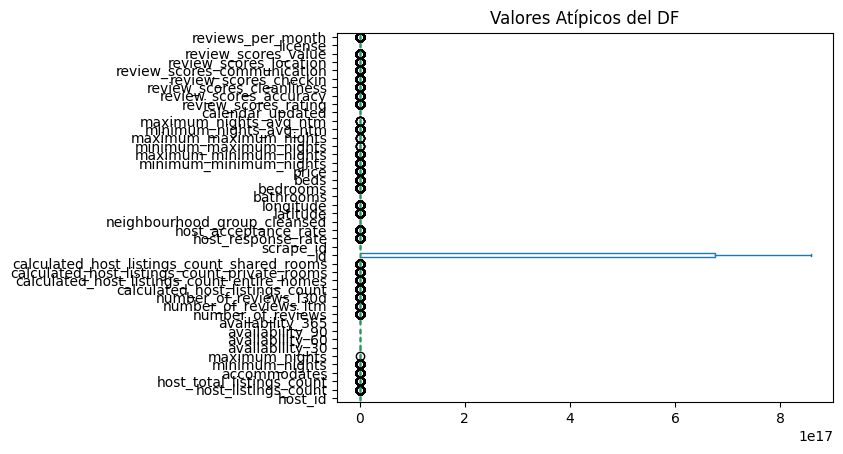

In [232]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
mexico_n.plot(kind='box', vert=False)
plt.title("Valores Atípicos del DF")
plt.show() #dibujamos el diagrama

*El box plot no se puede observar muy bien por la cantidad de datos, sin embargo utilizare el método de rango intercuartil, ya que además de ser un método más estricto para los valores atipicos, funciona mejor que el de desviación estandar con datos que no tienen una distribución normal, y en este caso al ser un data set tan grande es probable que muchos de los datos no tengan dicha distribución, por lo cual decidí utilizar el método ya mencionado.*

In [233]:
y=mexico_n
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

Limite superior permitido
 host_id                                         6.520127e+08
host_listings_count                             2.528303e+02
host_total_listings_count                       4.262030e+02
accommodates                                    9.933140e+00
minimum_nights                                  8.491454e+01
maximum_nights                                  2.018372e+03
availability_30                                 4.982418e+01
availability_60                                 1.013274e+02
availability_90                                 1.522572e+02
availability_365                                6.173025e+02
number_of_reviews                               2.261108e+02
number_of_reviews_ltm                           7.424966e+01
number_of_reviews_l30d                          6.890766e+00
calculated_host_listings_count                  1.091657e+02
calculated_host_listings_count_entire_homes     1.022059e+02
calculated_host_listings_count_private_rooms    1.937095e+

In [234]:
#Encontramos Ouliers del Dataframe
outliers= mexico_n[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
mexico_n_2= mexico_n[(y<=Limite_Superior)&(y>=Limite_Inferior)]
mexico_n_2

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16.0,16.0,NaN,1.0,365.0,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


In [236]:
#Corroboramos valores nulos del dataframe4
valores_nulos=mexico_n_2.isnull().sum()
valores_nulos

host_id                                           0
host_listings_count                             521
host_total_listings_count                       489
accommodates                                    537
minimum_nights                                  178
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               564
number_of_reviews_ltm                           332
number_of_reviews_l30d                          454
calculated_host_listings_count                  266
calculated_host_listings_count_entire_homes     375
calculated_host_listings_count_private_rooms    516
calculated_host_listings_count_shared_rooms     199
id                                                0
scrape_id                                         0
host_respons

In [237]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_m=mexico_n_2.copy()
data_clean_m=data_clean_m.fillna(round(mexico_n_2.mean(),1))
data_clean_m

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,0.0,0.19
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,0.0,0.54
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,0.0,0.31
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,0.0,4.80,4.90,4.90,4.90,4.90,4.90,4.80,0.0,1.10


In [238]:
dfm = pd.concat([data_clean_m, mexico_o], axis=1)
dfm

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,10531228,3.0,7.0,3.0,1.0,1125.0,0,19,49,324,...,CoyoacÃ¡n,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",t,30/03/2023,03/01/2014,24/06/2018,f
1,16840050,3.0,3.0,2.0,3.0,1125.0,11,41,71,346,...,CoyoacÃ¡n,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",t,30/03/2023,01/01/2014,04/11/2022,f
2,3531879,4.0,4.0,6.0,24.0,1125.0,0,0,0,87,...,Miguel Hidalgo,Entire rental unit,Entire home/apt,2 baths,"[""Wifi – 38 Mbps"", ""Central air conditioning"",...",t,29/03/2023,31/10/2012,21/12/2022,f
3,153786,1.0,1.0,2.0,1.0,7.0,28,58,88,363,...,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",t,29/03/2023,--,--,f
4,196253,16.0,16.0,3.1,1.0,365.0,30,59,89,357,...,CuauhtÃ©moc,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",t,30/03/2023,09/11/2011,26/03/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,488030249,3.0,4.0,2.0,3.0,365.0,17,47,77,352,...,Benito JuÃ¡rez,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",t,30/03/2023,--,--,f
24220,506816029,1.0,1.0,7.0,1.0,365.0,30,60,90,365,...,Iztacalco,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",t,29/03/2023,--,--,t
24221,154670560,1.0,6.0,2.0,5.0,365.0,29,32,32,180,...,Benito JuÃ¡rez,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",t,29/03/2023,--,--,f
24222,7799414,13.0,13.0,2.0,1.0,365.0,9,39,69,344,...,CuauhtÃ©moc,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",t,30/03/2023,--,--,t


In [239]:
valores_nulos=dfm.isnull().sum().sum()
valores_nulos

0

In [240]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       24224 non-null  int64  
 1   host_listings_count                           24224 non-null  float64
 2   host_total_listings_count                     24224 non-null  float64
 3   accommodates                                  24224 non-null  float64
 4   minimum_nights                                24224 non-null  float64
 5   maximum_nights                                24224 non-null  float64
 6   availability_30                               24224 non-null  int64  
 7   availability_60                               24224 non-null  int64  
 8   availability_90                               24224 non-null  int64  
 9   availability_365                              24224 non-null 

In [241]:
dfm['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

### **Private room**

In [397]:
PRm = dfm[dfm["room_type"] == "Private room"]
PRm

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,299558,2.0,3.0,2.0,2.0,1125.0,18,48,78,168,...,CuauhtÃ©moc,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",t,30/03/2023,01/11/2017,31/12/2022,f
16,3817743,1.0,1.0,2.0,1.0,14.0,28,58,88,363,...,CuauhtÃ©moc,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",t,30/03/2023,18/12/2012,30/01/2016,f
17,10659485,1.0,2.0,1.0,2.0,1125.0,0,0,9,284,...,CoyoacÃ¡n,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",t,30/03/2023,07/01/2014,15/05/2018,f
18,3083561,1.0,2.0,2.0,1.0,1125.0,30,60,90,365,...,Miguel Hidalgo,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",t,29/03/2023,--,--,f
21,647454,3.0,4.0,2.0,1.0,730.0,28,58,88,88,...,CoyoacÃ¡n,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",t,29/03/2023,--,--,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,505303275,6.0,6.0,4.0,1.0,365.0,0,0,27,301,...,CuauhtÃ©moc,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",t,30/03/2023,--,--,t
24213,506768013,1.0,1.0,2.0,2.0,31.0,26,56,86,176,...,Miguel Hidalgo,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",t,30/03/2023,--,--,f
24215,68325043,1.0,1.0,2.0,1.0,60.0,12,42,70,345,...,CuauhtÃ©moc,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",t,29/03/2023,--,--,f
24218,506810572,4.0,4.0,2.0,1.0,365.0,29,59,89,364,...,Iztacalco,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",t,29/03/2023,--,--,t


In [398]:
det_pr = []
corr_pr = []

#### “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

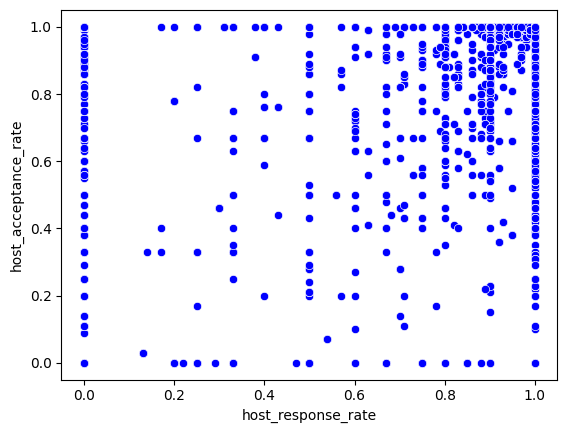

In [399]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PRm)

In [400]:
Vars_Indep= PRm[['host_response_rate']]
Var_Dep= PRm['host_acceptance_rate']

In [401]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [402]:
type(model)

sklearn.linear_model._base.LinearRegression

In [403]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [404]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.3824069659528213

In [405]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6183906256993401

In [406]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

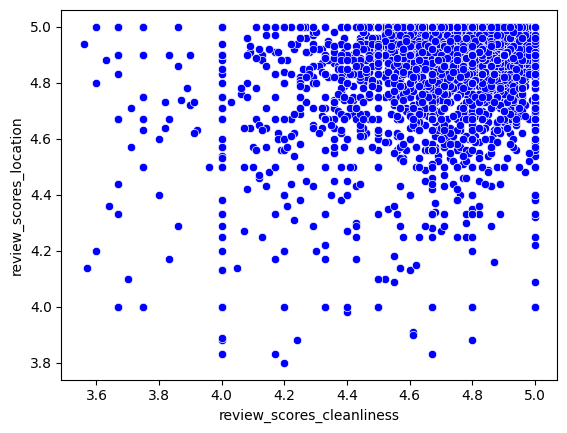

In [407]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=PRm)

In [408]:
Vars_Indep= PRm[['review_scores_cleanliness']]
Var_Dep= PRm['review_scores_location']

In [409]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [410]:
type(model)

sklearn.linear_model._base.LinearRegression

In [411]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [412]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.11235472775351174

In [413]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3351935675897014

In [414]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

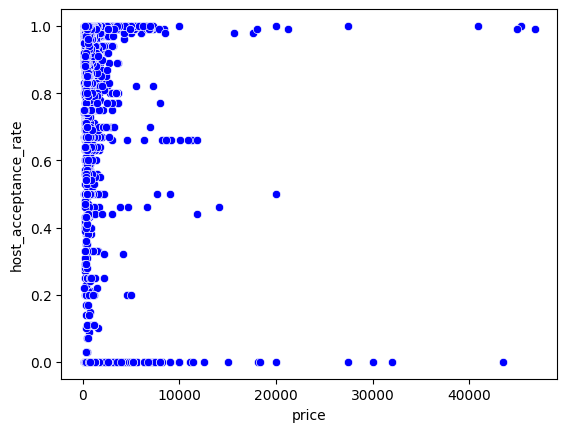

In [415]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=PRm)

In [416]:
Vars_Indep= PRm[['price']]
Var_Dep= PRm['host_acceptance_rate']

In [417]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [418]:
type(model)

sklearn.linear_model._base.LinearRegression

In [419]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [420]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.004640145475450663

In [421]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06811861328191189

In [422]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “availability_365 vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

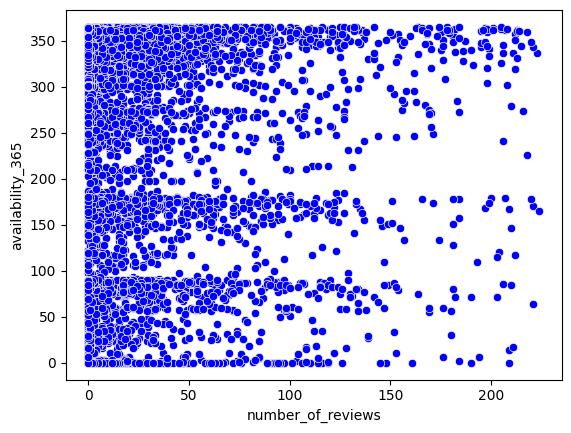

In [423]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=PRm)

In [424]:
Vars_Indep= PRm[['number_of_reviews']]
Var_Dep= PRm['availability_365']

In [425]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [426]:
type(model)

sklearn.linear_model._base.LinearRegression

In [427]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [428]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0037244137161634994

In [429]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06102797486533122

In [430]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

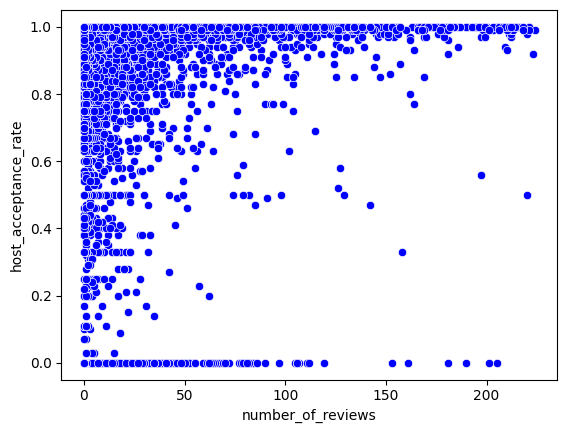

In [431]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=PRm)

In [432]:
Vars_Indep= PRm[['number_of_reviews']]
Var_Dep= PRm['host_acceptance_rate']

In [433]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [434]:
type(model)

sklearn.linear_model._base.LinearRegression

In [435]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [436]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04560252120115427

In [437]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21354746826210388

In [438]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “reviews_per_month vs review_scores_communication”

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

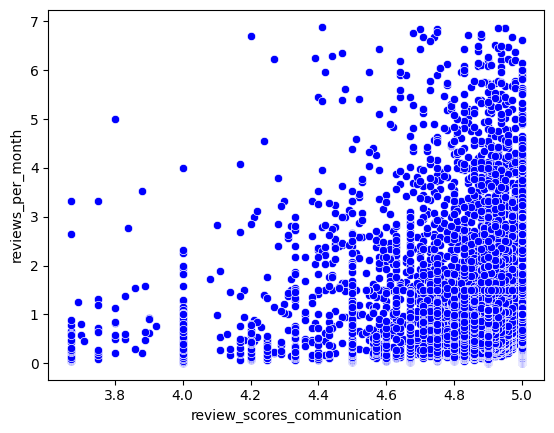

In [439]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=PRm)

In [440]:
Vars_Indep= PRm[['review_scores_communication']]
Var_Dep= PRm['reviews_per_month']

In [441]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [442]:
type(model)

sklearn.linear_model._base.LinearRegression

In [443]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [444]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.003693813512154809

In [445]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.060776751411660765

In [446]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### Modelo matemático para número de reseñas

In [447]:
Corr_Factors=PRm.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1['number_of_reviews']

<ipython-input-447-704e07391c8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=PRm.corr()


host_id                                         0.153553
host_listings_count                             0.011858
host_total_listings_count                       0.003940
accommodates                                    0.033296
minimum_nights                                  0.111282
maximum_nights                                  0.059592
availability_30                                 0.095535
availability_60                                 0.063806
availability_90                                 0.044627
availability_365                                0.061028
number_of_reviews                               1.000000
number_of_reviews_ltm                           0.638141
number_of_reviews_l30d                          0.403304
calculated_host_listings_count                  0.016216
calculated_host_listings_count_entire_homes     0.011089
calculated_host_listings_count_private_rooms    0.110851
calculated_host_listings_count_shared_rooms     0.023083
id                             

In [448]:
Vars_Indep= PRm[['number_of_reviews']]
Var_Dep= PRm['number_of_reviews_ltm']

In [449]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [450]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [451]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [452]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.23345443]),
 'rank_': 1,
 'singular_': array([3224.98480091]),
 'intercept_': 2.9143513554330944}

**Modelo matemático: y= 0.23345443x + 2.9143513554330944**

---




#### Tabla de todos los coeficientes de determinación y correlación

In [505]:
t_m = pd.DataFrame()
t_m['Variables'] = ['host_acceptance_rate vs host_response_rate', 'review_scores_location vs review_scores_cleanliness', 'host_acceptance_rate vs price', 'availability_365 vs number_of_reviews', 'host_acceptance_rate vs number_of_reviews', 'reviews_per_month vs review_scores_communication']
t_m['Correlación Private room'] = corr_pr
t_m['Determinación Private room'] = det_pr
t_m

,Variables,Correlación Private room,Determinación Private room
0,host_acceptance_rate vs host_response_rate,0.618391,0.382407
1,review_scores_location vs review_scores_cleanl...,0.335194,0.112355
2,host_acceptance_rate vs price,0.068119,0.004640
3,availability_365 vs number_of_reviews,0.061028,0.003724
4,host_acceptance_rate vs number_of_reviews,0.213547,0.045603
5,reviews_per_month vs review_scores_communication,0.060777,0.003694


### **Shared room**

In [506]:
SRm = dfm[dfm["room_type"] == "Shared room"]
SRm

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
174,3059169,1.0,1.0,2.0,1.0,1125.0,30,60,90,365,...,CuauhtÃ©moc,Shared room in rental unit,Shared room,1.5 shared baths,"[""Breakfast"", ""Wifi"", ""Washer"", ""Kitchen"", ""TV...",t,30/03/2023,--,--,f
437,27291692,2.0,2.0,2.0,1.0,1125.0,11,41,71,346,...,CoyoacÃ¡n,Shared room in condo,Shared room,2 shared baths,"[""81"" HDTV with Amazon Prime Video, Disney+, H...",t,30/03/2023,14/03/2016,19/08/2022,f
443,31426842,2.0,2.0,3.1,1.0,1125.0,1,1,27,302,...,Venustiano Carranza,Shared room in home,Shared room,3 shared baths,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Microw...",t,29/03/2023,22/05/2015,26/03/2023,t
472,28190065,2.0,2.0,3.1,2.0,1125.0,26,56,86,354,...,CuauhtÃ©moc,Shared room in guesthouse,Shared room,8 shared baths,"[""Wifi"", ""Patio or balcony"", ""Iron"", ""Washer"",...",t,30/03/2023,23/05/2015,04/12/2022,f
499,39173299,2.0,5.0,2.0,2.0,30.0,16,46,76,351,...,CoyoacÃ¡n,Shared room in home,Shared room,1 shared bath,"[""Dedicated workspace"", ""Wifi"", ""Free street p...",t,30/03/2023,07/08/2015,14/03/2023,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,477263486,12.0,13.0,1.0,1.0,365.0,30,60,90,365,...,CuauhtÃ©moc,Shared room in home,Shared room,2 shared baths,"[""Luggage dropoff allowed"", ""Long term stays a...",t,29/03/2023,--,--,t
23762,231963962,1.0,1.0,1.0,1.0,365.0,29,59,89,364,...,Benito JuÃ¡rez,Shared room in tent,Shared room,3.5 shared baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""BB...",t,30/03/2023,--,--,f
23894,498342139,2.0,2.0,5.0,2.0,365.0,30,60,90,364,...,CuauhtÃ©moc,Shared room in rental unit,Shared room,1 shared bath,"[""Wifi"", ""Kitchen"", ""TV"", ""Carbon monoxide ala...",f,30/03/2023,--,--,f
23898,121012818,1.0,1.0,3.0,1.0,365.0,30,60,90,364,...,CoyoacÃ¡n,Shared room in rental unit,Shared room,1 shared bath,"[""Smoke alarm"", ""Wifi"", ""Paid parking on premi...",t,30/03/2023,--,--,f


In [507]:
det_sr = []
corr_sr = []

#### “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

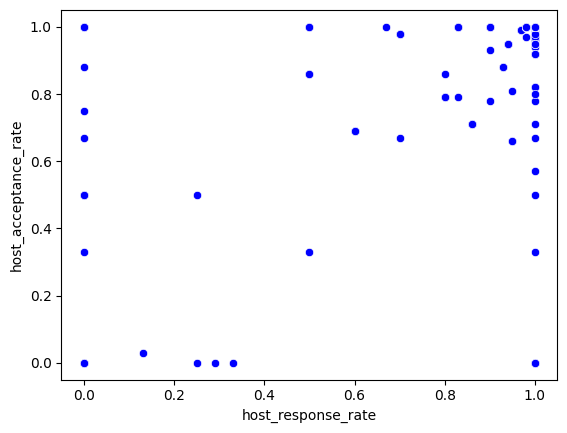

In [508]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=SRm)

In [509]:
Vars_Indep= SRm[['host_response_rate']]
Var_Dep= SRm['host_acceptance_rate']

In [510]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [511]:
type(model)

sklearn.linear_model._base.LinearRegression

In [512]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [513]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5150301512148927

In [514]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7176560117597377

In [515]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

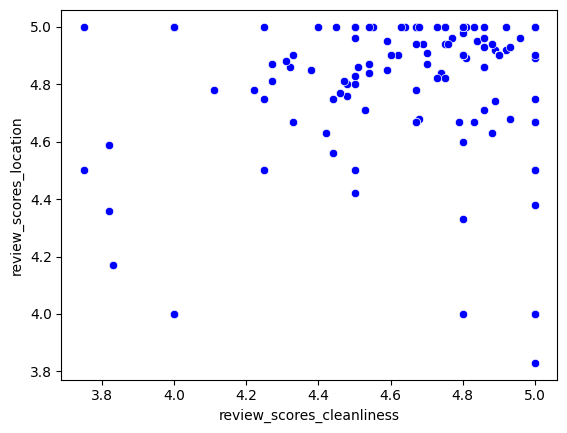

In [516]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=SRm)

In [517]:
Vars_Indep= SRm[['review_scores_cleanliness']]
Var_Dep= SRm['review_scores_location']

In [518]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [519]:
type(model)

sklearn.linear_model._base.LinearRegression

In [520]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [521]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08122251666921398

In [522]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2849956432460222

In [523]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

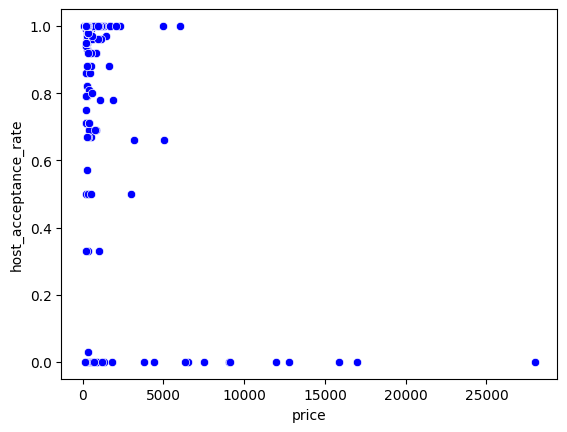

In [524]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=SRm)

In [525]:
Vars_Indep= SRm[['price']]
Var_Dep= SRm['host_acceptance_rate']

In [526]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [527]:
type(model)

sklearn.linear_model._base.LinearRegression

In [528]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [529]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.09681294340769875

In [530]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3111477838707818

In [531]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “availability_365 vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

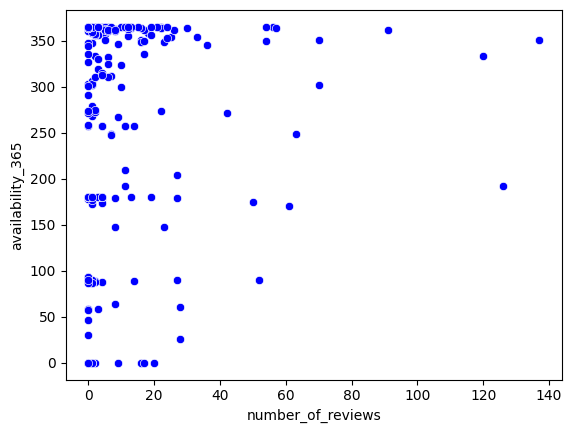

In [532]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=SRm)

In [533]:
Vars_Indep= SRm[['number_of_reviews']]
Var_Dep= SRm['availability_365']

In [534]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [535]:
type(model)

sklearn.linear_model._base.LinearRegression

In [536]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [537]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0013880801890647776

In [538]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.037256948198487454

In [539]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

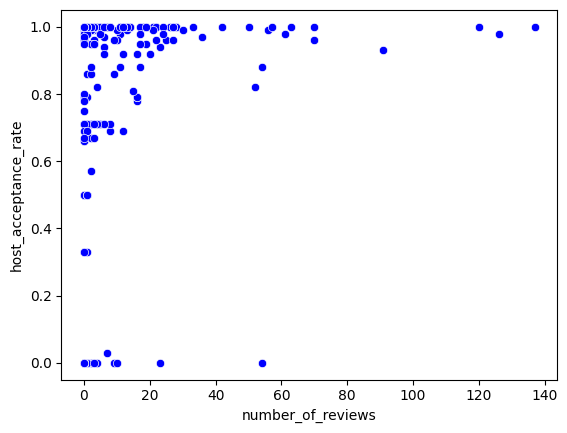

In [540]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=SRm)

In [541]:
Vars_Indep= SRm[['number_of_reviews']]
Var_Dep= SRm['host_acceptance_rate']

In [542]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [543]:
type(model)

sklearn.linear_model._base.LinearRegression

In [544]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [545]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.056020974451733596

In [546]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2366875037929413

In [547]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “reviews_per_month vs review_scores_communication”

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

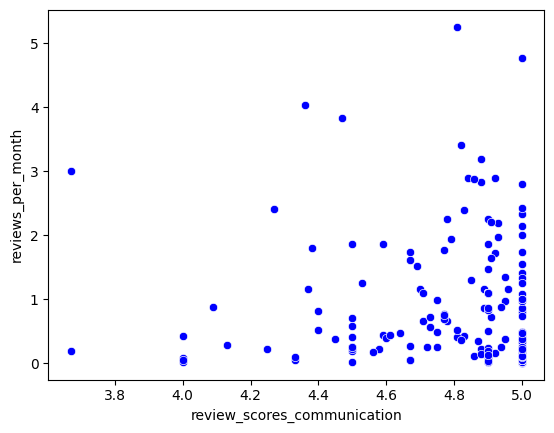

In [548]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=SRm)

In [549]:
Vars_Indep= SRm[['review_scores_communication']]
Var_Dep= SRm['reviews_per_month']

In [550]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [551]:
type(model)

sklearn.linear_model._base.LinearRegression

In [552]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [553]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.002446955072870627

In [554]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.049466706711389495

In [555]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### Modelo matemático para número de reseñas

In [556]:
Corr_Factors=SRm.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1['number_of_reviews']

<ipython-input-556-1c56da60bc78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=SRm.corr()


host_id                                         0.142337
host_listings_count                             0.095548
host_total_listings_count                       0.078988
accommodates                                    0.006259
minimum_nights                                  0.180596
maximum_nights                                  0.059873
availability_30                                 0.151242
availability_60                                 0.103301
availability_90                                 0.075508
availability_365                                0.037257
number_of_reviews                               1.000000
number_of_reviews_ltm                           0.704295
number_of_reviews_l30d                          0.368004
calculated_host_listings_count                  0.105597
calculated_host_listings_count_entire_homes     0.010060
calculated_host_listings_count_private_rooms    0.174867
calculated_host_listings_count_shared_rooms     0.040314
id                             

In [557]:
Vars_Indep= SRm[['number_of_reviews']]
Var_Dep= SRm['number_of_reviews_ltm']

In [558]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [559]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [560]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [561]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.33546933]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 1.3927239048018758}

**Modelo matemático: y= 0.33546933x + 1.3927239048018758**

---




#### Tabla de todos los coeficientes de determinación y correlación

In [562]:
t_m['Correlación Shared room'] = corr_sr
t_m['Determinación Shared room'] = det_sr
t_m

,Variables,Correlación Private room,Determinación Private room,Correlación Shared room,Determinación Shared room
0,host_acceptance_rate vs host_response_rate,0.618391,0.382407,0.717656,0.515030
1,review_scores_location vs review_scores_cleanl...,0.335194,0.112355,0.284996,0.081223
2,host_acceptance_rate vs price,0.068119,0.004640,0.311148,0.096813
3,availability_365 vs number_of_reviews,0.061028,0.003724,0.037257,0.001388
4,host_acceptance_rate vs number_of_reviews,0.213547,0.045603,0.236688,0.056021
5,reviews_per_month vs review_scores_communication,0.060777,0.003694,0.049467,0.002447


## **USA California**

### **Preprocesamiento**

#### ***Valores nulos***

Cantidad total de valores nulos

In [563]:
valores_nulos = eua.isnull().sum().sum()
valores_nulos

48877

Separamos por tipo de dato

In [564]:
eua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿id                                         6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [565]:
eua_o = eua.select_dtypes(include=['object'])
eua_i = eua.select_dtypes(include=['int64'])
eua_f = eua.select_dtypes(include=['float'])

eua_n = pd.concat([eua_i, eua_f],axis=1)

Datos numéricos

In [566]:
eua_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1,1,3,2,30,8,22,30,128,...,1125.0,NaN,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2,2,4,30,60,30,60,90,365,...,60.0,NaN,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13,14,1,32,90,30,60,90,365,...,90.0,NaN,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2,6,4,9,91,30,60,90,365,...,91.0,NaN,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2,2,3,1,26,16,45,75,159,...,26.0,NaN,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9,9,2,1,28,14,34,56,57,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,499392537,1,1,2,1,7,25,52,82,356,...,1125.0,NaN,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1,1,1,31,60,29,59,89,364,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,485596413,3,4,2,1,7,30,60,90,179,...,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
valores_nulos = eua_n.isnull().sum()
valores_nulos

host_id                                            0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
minimum_nights                                     0
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
ï»¿id                                              0
scrape_id                                     

*En el caso de todas las columnas de reseñas y calificaciones, con el fin de no afectar estas puntuaciones otorgando valores de 0, se pondra la mediana con el fin de que tampoco se afecte el análisis por valores atipicos. En los otros caso se sustituíran los valores nulos por 0*

In [568]:
eua_n["review_scores_rating"] = eua_n["review_scores_rating"].fillna(round(eua_n["review_scores_rating"].median(),1))
eua_n["review_scores_accuracy"] = eua_n["review_scores_accuracy"].fillna(round(eua_n["review_scores_accuracy"].median(),1))
eua_n["review_scores_cleanliness"] = eua_n["review_scores_cleanliness"].fillna(round(eua_n["review_scores_cleanliness"].median(),1))
eua_n["review_scores_checkin"] = eua_n["review_scores_checkin"].fillna(round(eua_n["review_scores_checkin"].median(),1))
eua_n["review_scores_communication"] = eua_n["review_scores_communication"].fillna(round(eua_n["review_scores_communication"].median(),1))
eua_n["review_scores_location"] = eua_n["review_scores_location"].fillna(round(eua_n["review_scores_location"].median(),1))
eua_n["review_scores_value"] = eua_n["review_scores_value"].fillna(round(eua_n["review_scores_value"].median(),1))
eua_n["reviews_per_month"] = eua_n["reviews_per_month"].fillna(round(eua_n["reviews_per_month"].median(),1))

In [569]:
eua_n = eua_n.fillna(0)

In [570]:
valores_nulos = eua_n.isnull().sum()
valores_nulos

host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
ï»¿id                                           0
scrape_id                                       0
host_response_rate                              0


In [571]:
eua_n

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1,1,3,2,30,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2,2,4,30,60,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13,14,1,32,90,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2,6,4,9,91,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2,2,3,1,26,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9,9,2,1,28,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1,1,2,1,7,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1,1,1,31,60,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3,4,2,1,7,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


Datos no numéricos

In [572]:
eua_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,NaN,f
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,NaN,f
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [573]:
valores_nulos = eua_o.isnull().sum()
valores_nulos

listing_url                  0
last_scraped                 0
source                       0
name                         0
description                 47
neighborhood_overview     2086
picture_url                  0
host_url                     0
host_name                    0
host_since                   0
host_location             1221
host_about                2252
host_response_time        1019
host_is_superhost            9
host_thumbnail_url           0
host_picture_url             0
host_neighbourhood         301
host_verifications           0
host_has_profile_pic         0
host_identity_verified       0
neighbourhood             2086
neighbourhood_cleansed       0
property_type                0
room_type                    0
bathrooms_text              14
amenities                    0
has_availability             0
calendar_last_scraped        0
first_review              1325
last_review               1325
license                   2758
instant_bookable             0
dtype: i

*En el caso de los valores no numericos, con el fin de identificar aquellos que no tienen registro, voy a sustituír los valores nulos por el string "--"*

In [574]:
eua_o = eua_o.fillna("--")

In [575]:
valores_nulos = eua_o.isnull().sum()
valores_nulos

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [576]:
eua_o.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,--,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


#### ***Valores atípicos***

<Figure size 1500x800 with 0 Axes>

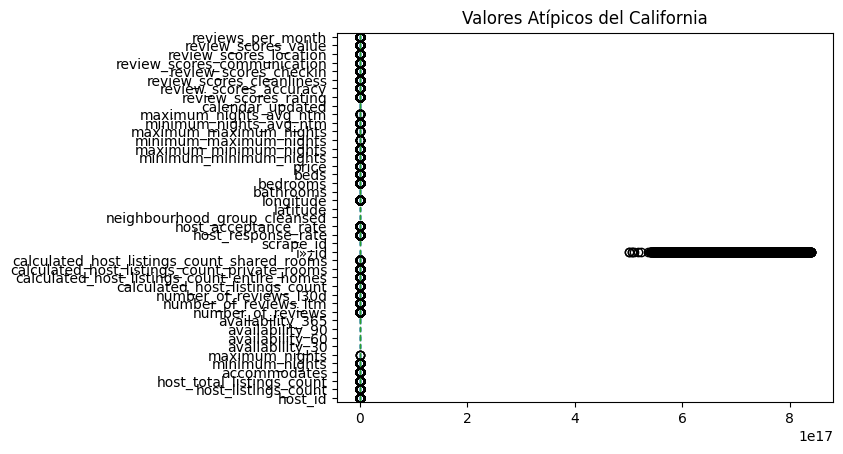

In [577]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
eua_n.plot(kind='box', vert=False)
plt.title("Valores Atípicos del California")
plt.show() #dibujamos el diagrama

*El box plot no se puede observar muy bien por la cantidad de datos, sin embargo utilizare el método de rango intercuartil, ya que además de ser un método más estricto para los valores atipicos, funciona mejor que el de desviación estandar con datos que no tienen una distribución normal, y en este caso al ser un data set tan grande es probable que muchos de los datos no tengan dicha distribución, por lo cual decidí utilizar el método ya mencionado.*

In [578]:
y=eua_n
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido\n", Limite_Superior)
print("Limite inferior permitido\n", Limite_Inferior)

Limite superior permitido
 host_id                                         5.371002e+08
host_listings_count                             2.300397e+03
host_total_listings_count                       2.842239e+03
accommodates                                    9.034994e+00
minimum_nights                                  1.755102e+02
maximum_nights                                  3.662171e+04
availability_30                                 4.639164e+01
availability_60                                 9.577126e+01
availability_90                                 1.465721e+02
availability_365                                5.574500e+02
number_of_reviews                               3.315465e+02
number_of_reviews_ltm                           7.831711e+01
number_of_reviews_l30d                          5.179824e+00
calculated_host_listings_count                  1.046359e+02
calculated_host_listings_count_entire_homes     9.811532e+01
calculated_host_listings_count_private_rooms    3.221346e+

In [579]:
#Encontramos Ouliers del Dataframe
outliers= eua_n[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [580]:
eua_n_2= eua_n[(y<=Limite_Superior)&(y>=Limite_Inferior)]
eua_n_2

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


In [581]:
#Corroboramos valores nulos del dataframe4
valores_nulos=eua_n_2.isnull().sum()
valores_nulos

host_id                                           0
host_listings_count                             204
host_total_listings_count                       161
accommodates                                     85
minimum_nights                                  132
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               194
number_of_reviews_ltm                           103
number_of_reviews_l30d                          129
calculated_host_listings_count                  292
calculated_host_listings_count_entire_homes     292
calculated_host_listings_count_private_rooms    236
calculated_host_listings_count_shared_rooms      52
ï»¿id                                             0
scrape_id                                         0
host_respons

In [582]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_eua=eua_n_2.copy()
data_clean_eua=data_clean_eua.fillna(round(eua_n_2.mean(),1))
data_clean_eua

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,1125.0,0.0,4.87,4.93,4.92,4.95,4.88,4.98,4.76,2.31
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,60.0,0.0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,0.66
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,90.0,0.0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,0.09
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,91.0,0.0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,0.17
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,26.0,0.0,4.91,4.94,4.94,4.95,4.96,4.93,4.74,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,28.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,1125.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,60.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,1125.0,0.0,4.90,4.90,4.90,5.00,5.00,4.90,4.80,0.60


In [583]:
dfe = pd.concat([data_clean_eua, eua_o], axis=1)
dfe

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,1169,1.0,1.0,3.0,2.0,30.0,8,22,30,128,...,Entire serviced apartment,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,8904,2.0,2.0,4.0,30.0,60.0,30,60,90,365,...,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,03/05/2009,06/08/2017,--,f
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
3,24215,2.0,6.0,4.0,9.0,91.0,30,60,90,365,...,Entire condo,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,495900269,9.0,9.0,2.0,1.0,28.0,14,34,56,57,...,Entire rental unit,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,--,--,147904,t
6932,499392537,1.0,1.0,2.0,1.0,7.0,25,52,82,356,...,Entire rental unit,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,Private room in rental unit,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",t,06/03/2023,--,--,--,f
6934,485596413,3.0,4.0,2.0,1.0,7.0,30,60,90,179,...,Private room in home,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",t,06/03/2023,--,--,2022-012562STR,f


In [584]:
valores_nulos=dfe.isnull().sum().sum()
valores_nulos

0

In [585]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       6936 non-null   int64  
 1   host_listings_count                           6936 non-null   float64
 2   host_total_listings_count                     6936 non-null   float64
 3   accommodates                                  6936 non-null   float64
 4   minimum_nights                                6936 non-null   float64
 5   maximum_nights                                6936 non-null   float64
 6   availability_30                               6936 non-null   int64  
 7   availability_60                               6936 non-null   int64  
 8   availability_90                               6936 non-null   int64  
 9   availability_365                              6936 non-null   i

### **Private room**

In [586]:
PRe = dfe[dfe["room_type"] == "Private room"]
PRe

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,21994,13.0,14.0,1.0,32.0,90.0,30,60,90,365,...,Private room in rental unit,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",t,06/03/2023,08/09/2014,27/10/2022,--,f
4,7149,2.0,2.0,3.0,1.0,26.0,16,45,75,159,...,Private room in condo,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,1269188,1.0,3.0,2.0,30.0,60.0,15,27,57,331,...,Private room in rental unit,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",t,06/03/2023,22/04/2014,26/11/2022,--,f
7,36752,2.0,3.0,2.0,1.0,90.0,30,60,90,365,...,Private room,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,216682,9.0,9.0,1.0,30.0,365.0,0,26,55,55,...,Private room in rental unit,Private room,--,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",t,06/03/2023,10/07/2011,28/02/2023,--,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,486687635,32.0,38.0,2.0,1.0,1125.0,8,17,47,316,...,Room in hotel,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,226555948,67.0,86.0,2.0,120.0,365.0,2,32,62,336,...,Private room in home,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,--,--,--,f
6930,286802480,6.0,10.0,1.0,30.0,999.0,5,35,65,339,...,Private room in home,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",t,06/03/2023,--,--,--,t
6933,499294716,1.0,1.0,1.0,31.0,60.0,29,59,89,364,...,Private room in rental unit,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",t,06/03/2023,--,--,--,f


In [587]:
det_pr = []
corr_pr = []

#### “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

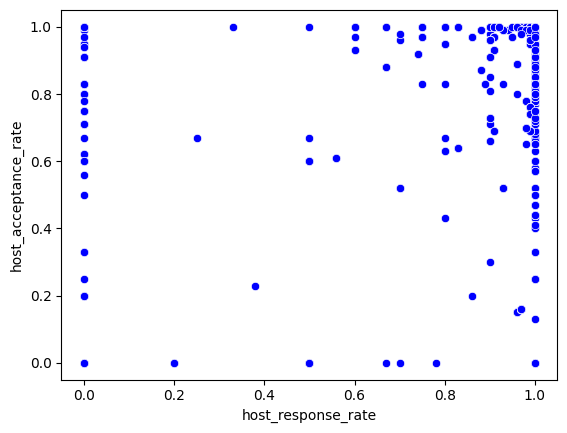

In [588]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PRe)

In [589]:
Vars_Indep= PRe[['host_response_rate']]
Var_Dep= PRe['host_acceptance_rate']

In [590]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [591]:
type(model)

sklearn.linear_model._base.LinearRegression

In [592]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [593]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5963243998147931

In [594]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7722204347301314

In [595]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

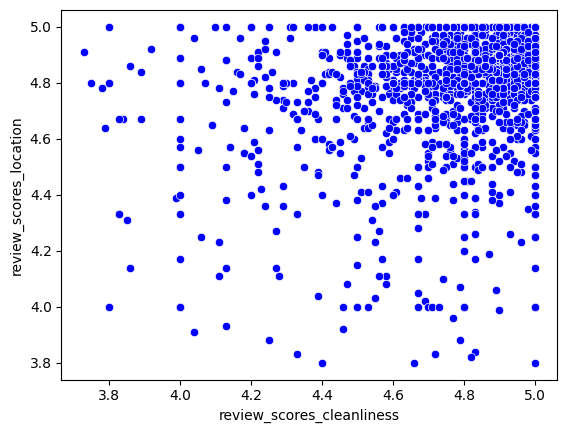

In [596]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=PRe)

In [597]:
Vars_Indep= PRe[['review_scores_cleanliness']]
Var_Dep= PRe['review_scores_location']

In [598]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [599]:
type(model)

sklearn.linear_model._base.LinearRegression

In [600]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [601]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.09595931851486905

In [602]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.3097730112757873

In [603]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

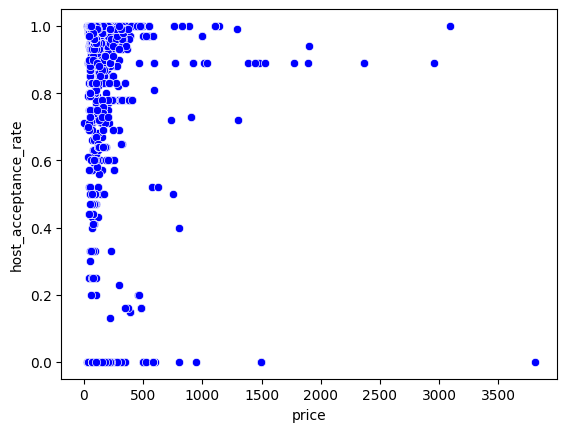

In [604]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=PRe)

In [605]:
Vars_Indep= PRe[['price']]
Var_Dep= PRe['host_acceptance_rate']

In [606]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [607]:
type(model)

sklearn.linear_model._base.LinearRegression

In [608]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [609]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0005644378799483096

In [610]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.02375790142138631

In [611]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “availability_365 vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

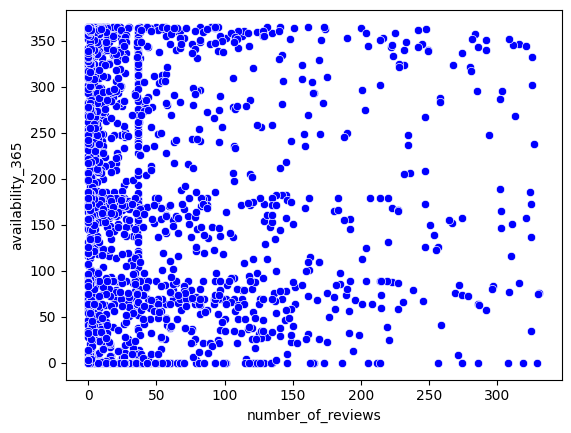

In [612]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=PRe)

In [613]:
Vars_Indep= PRe[['number_of_reviews']]
Var_Dep= PRe['availability_365']

In [614]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [615]:
type(model)

sklearn.linear_model._base.LinearRegression

In [616]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [617]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.003849293729428549

In [618]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06204267667846503

In [619]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

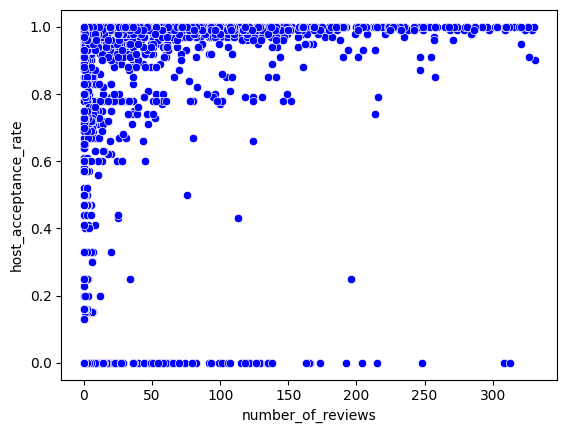

In [620]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=PRe)

In [621]:
Vars_Indep= PRe[['number_of_reviews']]
Var_Dep= PRe['host_acceptance_rate']

In [622]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [623]:
type(model)

sklearn.linear_model._base.LinearRegression

In [624]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [625]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.047056710867405704

In [626]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2169255883186806

In [627]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### “reviews_per_month vs review_scores_communication”

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

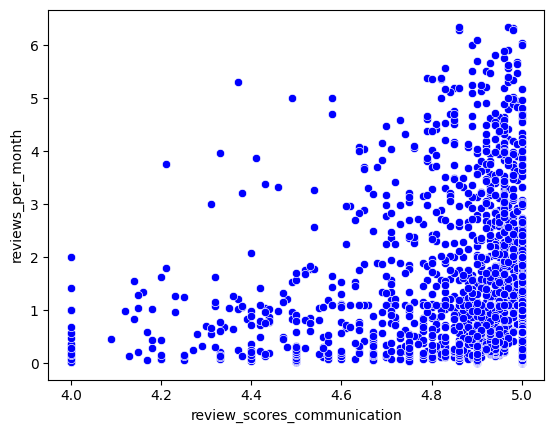

In [628]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=PRe)

In [629]:
Vars_Indep= PRe[['review_scores_communication']]
Var_Dep= PRe['reviews_per_month']

In [630]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [631]:
type(model)

sklearn.linear_model._base.LinearRegression

In [632]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [633]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

5.99687003188798e-06

In [634]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0024488507573733396

In [635]:
det_pr.append(coef_Deter)
corr_pr.append(coef_Correl)

#### Modelo matemático para número de reseñas

In [636]:
Corr_Factors=PRe.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1['number_of_reviews']

<ipython-input-636-67f1f318348e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=PRe.corr()


host_id                                         0.208543
host_listings_count                             0.127545
host_total_listings_count                       0.112229
accommodates                                    0.012316
minimum_nights                                  0.257535
maximum_nights                                  0.138634
availability_30                                 0.002283
availability_60                                 0.012176
availability_90                                 0.020948
availability_365                                0.062043
number_of_reviews                               1.000000
number_of_reviews_ltm                           0.490371
number_of_reviews_l30d                          0.302509
calculated_host_listings_count                  0.144877
calculated_host_listings_count_entire_homes     0.095318
calculated_host_listings_count_private_rooms    0.151692
calculated_host_listings_count_shared_rooms     0.028606
ï»¿id                          

In [700]:
Vars_Indep= PRe[['number_of_reviews']]
Var_Dep= PRe['reviews_per_month']

In [701]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [702]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [703]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [704]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0108463]),
 'rank_': 1,
 'singular_': array([3228.87531776]),
 'intercept_': 0.695899052317549}

**Modelo matemático: y= 0.0108463x + 0.695899052317549**

---




#### Tabla de todos los coeficientes de determinación y correlación

In [642]:
t_e = pd.DataFrame()
t_e['Variables'] = ['host_acceptance_rate vs host_response_rate', 'review_scores_location vs review_scores_cleanliness', 'host_acceptance_rate vs price', 'availability_365 vs number_of_reviews', 'host_acceptance_rate vs number_of_reviews', 'reviews_per_month vs review_scores_communication']
t_e['Correlación Private room'] = corr_pr
t_e['Determinación Private room'] = det_pr
t_e

,Variables,Correlación Private room,Determinación Private room
0,host_acceptance_rate vs host_response_rate,0.772220,0.596324
1,review_scores_location vs review_scores_cleanl...,0.309773,0.095959
2,host_acceptance_rate vs price,0.023758,0.000564
3,availability_365 vs number_of_reviews,0.062043,0.003849
4,host_acceptance_rate vs number_of_reviews,0.216926,0.047057
5,reviews_per_month vs review_scores_communication,0.002449,0.000006


### **Shared room**

In [643]:
SRe = dfe[dfe["room_type"] == "Shared room"]
SRe

,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
283,1165164,1.0,3.0,2.0,30.0,1125.0,30,60,90,365,...,Shared room in loft,Shared room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,30/04/2013,22/11/2019,STR-0000099,f
296,1427845,1.0,2.0,2.0,35.0,60.0,30,60,90,206,...,Shared room in rental unit,Shared room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",t,06/03/2023,02/07/2013,27/11/2015,--,f
679,22931450,4.0,33.0,1.0,1.0,365.0,23,52,82,357,...,Shared room in bed and breakfast,Shared room,10 shared baths,"[""Self check-in"", ""Cooking basics"", ""Luggage d...",t,06/03/2023,15/11/2014,27/02/2023,933345,t
1039,4352266,2.0,2.0,2.0,30.0,1110.0,30,60,90,365,...,Shared room in rental unit,Shared room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Free ...",t,06/03/2023,--,--,--,f
1254,576273,3.0,3.0,1.0,30.0,1125.0,30,60,90,365,...,Shared room in home,Shared room,1 shared bath,"[""Essentials"", ""Hangers"", ""Iron"", ""Shampoo"", ""...",t,06/03/2023,--,--,--,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,459402263,3.0,3.0,6.0,1.0,18.0,28,58,84,354,...,Shared room in home,Shared room,2 shared baths,"[""Oven"", ""Security cameras on property"", ""Self...",t,06/03/2023,26/06/2022,13/02/2023,2022-004627STR,t
6313,407298390,9.0,12.0,1.0,1.0,14.0,27,56,86,360,...,Shared room in hostel,Shared room,1 shared bath,"[""Security cameras on property"", ""Self check-i...",t,06/03/2023,22/10/2022,19/02/2023,Exempt,t
6416,330561160,1.0,7.0,2.0,1.0,7.0,0,0,2,2,...,Shared room in rental unit,Shared room,1 shared bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",t,06/03/2023,--,--,2022-011382STR,f
6715,238538141,1.0,2.0,1.0,31.0,365.0,30,45,45,231,...,Shared room in home,Shared room,1 shared bath,"[""Security cameras on property"", ""BBQ grill"", ...",t,06/03/2023,--,--,--,f


In [644]:
det_sr = []
corr_sr = []

#### “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

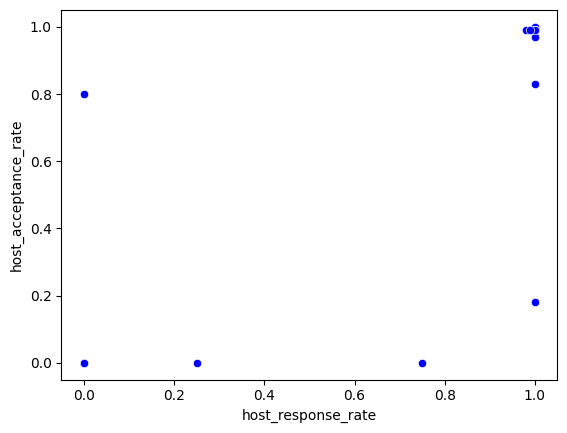

In [645]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=SRe)

In [646]:
Vars_Indep= SRe[['host_response_rate']]
Var_Dep= SRe['host_acceptance_rate']

In [647]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [648]:
type(model)

sklearn.linear_model._base.LinearRegression

In [649]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [650]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.8804511983301164

In [651]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9383236106643147

In [652]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

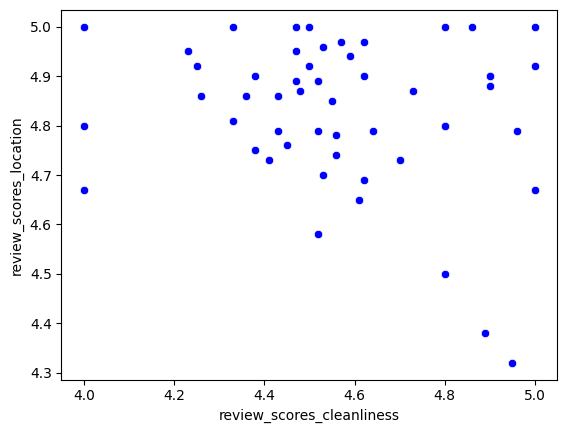

In [653]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=SRe)

In [654]:
Vars_Indep= SRe[['review_scores_cleanliness']]
Var_Dep= SRe['review_scores_location']

In [655]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [656]:
type(model)

sklearn.linear_model._base.LinearRegression

In [657]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [658]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0027708658627023652

In [659]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.052639014644105614

In [660]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

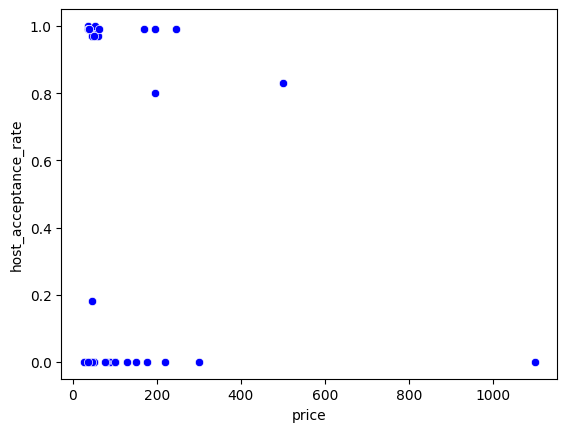

In [661]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=SRe)

In [662]:
Vars_Indep= SRe[['price']]
Var_Dep= SRe['host_acceptance_rate']

In [663]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [664]:
type(model)

sklearn.linear_model._base.LinearRegression

In [665]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [666]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.004326118604609408

In [667]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0657732362333602

In [668]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “availability_365 vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

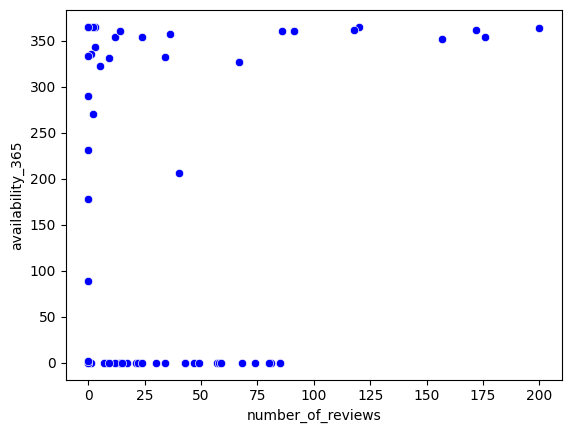

In [669]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=SRe)

In [670]:
Vars_Indep= SRe[['number_of_reviews']]
Var_Dep= SRe['availability_365']

In [671]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [672]:
type(model)

sklearn.linear_model._base.LinearRegression

In [673]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [674]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.021187337635050096

In [675]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.145558708551052

In [676]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “host_acceptance_rate vs number_of_reviews ”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

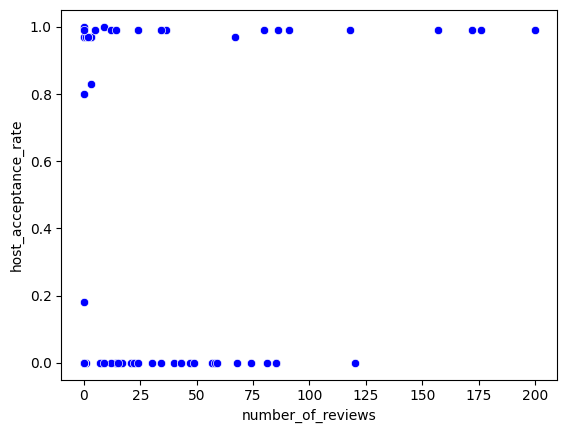

In [677]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=SRe)

In [678]:
Vars_Indep= SRe[['number_of_reviews']]
Var_Dep= SRe['host_acceptance_rate']

In [679]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [680]:
type(model)

sklearn.linear_model._base.LinearRegression

In [681]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [682]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03558028804823321

In [683]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1886273788404886

In [684]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### “reviews_per_month vs review_scores_communication”

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

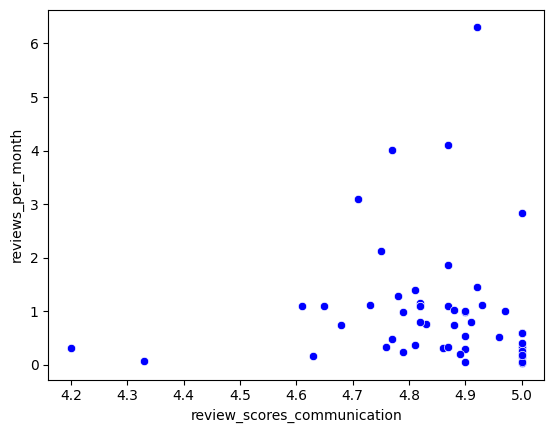

In [685]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=SRe)

In [686]:
Vars_Indep= SRe[['review_scores_communication']]
Var_Dep= SRe['reviews_per_month']

In [687]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [688]:
type(model)

sklearn.linear_model._base.LinearRegression

In [689]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [690]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00545366486612775

In [691]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.07384893273519767

In [692]:
det_sr.append(coef_Deter)
corr_sr.append(coef_Correl)

#### Modelo matemático para número de reseñas

In [693]:
Corr_Factors=SRe.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1['number_of_reviews']

<ipython-input-693-fcdcbafb5679>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=SRe.corr()


host_id                                         0.101703
host_listings_count                             0.073040
host_total_listings_count                       0.158912
accommodates                                    0.137248
minimum_nights                                  0.430922
maximum_nights                                  0.073231
availability_30                                 0.115439
availability_60                                 0.127372
availability_90                                 0.132343
availability_365                                0.145559
number_of_reviews                               1.000000
number_of_reviews_ltm                           0.502980
number_of_reviews_l30d                          0.527096
calculated_host_listings_count                  0.097755
calculated_host_listings_count_entire_homes     0.128655
calculated_host_listings_count_private_rooms    0.144650
calculated_host_listings_count_shared_rooms     0.474583
ï»¿id                          

In [705]:
Vars_Indep= SRe[['number_of_reviews']]
Var_Dep= SRe['reviews_per_month']

In [706]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [707]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [708]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [709]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01358815]),
 'rank_': 1,
 'singular_': array([388.72185966]),
 'intercept_': 0.4269213611821772}

**Modelo matemático: y= 0.01358815x + 0.4269213611821772**

---




#### Tabla de todos los coeficientes de determinación y correlación

In [699]:
t_e['Correlación Shared room'] = corr_sr
t_e['Determinación Shared room'] = det_sr
t_e

,Variables,Correlación Private room,Determinación Private room,Correlación Shared room,Determinación Shared room
0,host_acceptance_rate vs host_response_rate,0.772220,0.596324,0.938324,0.880451
1,review_scores_location vs review_scores_cleanl...,0.309773,0.095959,0.052639,0.002771
2,host_acceptance_rate vs price,0.023758,0.000564,0.065773,0.004326
3,availability_365 vs number_of_reviews,0.062043,0.003849,0.145559,0.021187
4,host_acceptance_rate vs number_of_reviews,0.216926,0.047057,0.188627,0.035580
5,reviews_per_month vs review_scores_communication,0.002449,0.000006,0.073849,0.005454
